# OllamaBench Evaluation Notebook (07.07.2025)


## Comparison to Chatbot Arena

This notebook provides a comparative analysis of ELO scores for various Large Language Models (LLMs) from two different sources: the public `LMArena.ai` and a personal `Meine LLM Arena`. We will visualize the data to understand the similarities, differences, and potential correlations between the two rating systems.

findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond'

Diagramm wurde als 'vergleich_chatbot_arena.png' gespeichert.


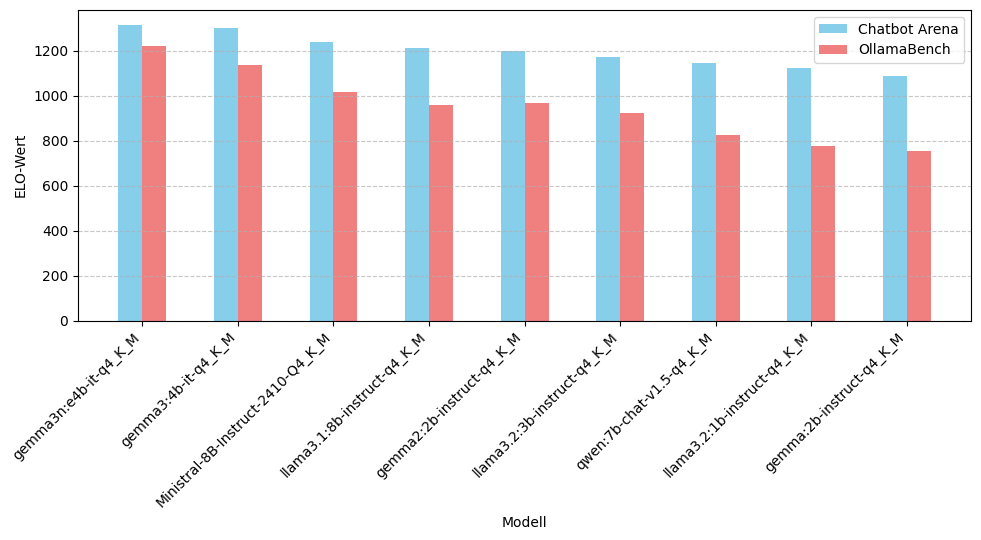

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


my_arena_data = [
    {"Model": "gemma3n:e4b-it-q4_K_M", "Avg ELO": 1222.7},
    {"Model": "gemma3:4b-it-q4_K_M", "Avg ELO": 1136.3},
    {"Model": "Ministral-8B-Instruct-2410-Q4_K_M", "Avg ELO": 1016.0},
    {"Model": "llama3.1:8b-instruct-q4_K_M", "Avg ELO": 957.7},
    {"Model": "gemma2:2b-instruct-q4_K_M", "Avg ELO": 967.4},
    {"Model": "llama3.2:3b-instruct-q4_K_M", "Avg ELO": 922.9},
    {"Model": "qwen:7b-chat-v1.5-q4_K_M", "Avg ELO": 825.7},
    {"Model": "llama3.2:1b-instruct-q4_K_M", "Avg ELO": 777.0},
    {"Model": "gemma:2b-instruct-q4_K_M", "Avg ELO": 752.5},
]
lm_arena_data = [
    {"Model": "gemma3n:e4b-it-q4_K_M", "Avg ELO": 1315},
    {"Model": "gemma3:4b-it-q4_K_M", "Avg ELO": 1301},
    {"Model": "Ministral-8B-Instruct-2410-Q4_K_M", "Avg ELO": 1240},
    {"Model": "llama3.1:8b-instruct-q4_K_M", "Avg ELO": 1213},
    {"Model": "gemma2:2b-instruct-q4_K_M", "Avg ELO": 1198},
    {"Model": "llama3.2:3b-instruct-q4_K_M", "Avg ELO": 1173},
    {"Model": "qwen:7b-chat-v1.5-q4_K_M", "Avg ELO": 1145},
    {"Model": "llama3.2:1b-instruct-q4_K_M", "Avg ELO": 1124},
    {"Model": "gemma:2b-instruct-q4_K_M", "Avg ELO": 1088},
]
df_lm_arena = pd.DataFrame(lm_arena_data)
df_lm_arena['Source'] = 'LMArena.ai'

df_my_arena = pd.DataFrame(my_arena_data)
df_my_arena['Source'] = 'Meine LLM Arena'

df_combined = pd.concat([df_lm_arena, df_my_arena])

model_order = df_lm_arena.sort_values(by='Avg ELO', ascending=False)['Model'].tolist()
df_combined['Model'] = pd.Categorical(df_combined['Model'], categories=model_order, ordered=True)
df_combined = df_combined.sort_values(by=['Model', 'Source'])

plt.figure(figsize=(10, 5.5)) 


bar_width = 0.25

models = df_combined['Model'].unique()
ind = np.arange(len(models))

lm_arena_elos = df_combined[df_combined['Source'] == 'LMArena.ai'].set_index('Model').loc[models]['Avg ELO']
plt.bar(ind - bar_width/2, lm_arena_elos, bar_width, label='Chatbot Arena', color='skyblue')

my_arena_elos = df_combined[df_combined['Source'] == 'Meine LLM Arena'].set_index('Model').loc[models]['Avg ELO']
plt.bar(ind + bar_width/2, my_arena_elos, bar_width, label='OllamaBench', color='lightcoral')

plt.xlabel('Modell')
plt.ylabel('ELO-Wert')
plt.xticks(ind, models, rotation=45, ha='right') 
plt.legend() 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout() 


output_filename = 'vergleich_chatbot_arena.png'
plt.savefig(output_filename, dpi=300, bbox_inches='tight', transparent=False)
print(f"Diagramm wurde als '{output_filename}' gespeichert.")
plt.show()


### Conclusion
The analysis reveals two key findings:  
1.  **Strong Correlation:** The relative ranking of models is highly consistent between `LMArena.ai` and `Meine LLM Arena`. Models that perform well in one arena tend to perform well in the other.  
2.  **Systematic ELO Difference:** There is a consistent offset in the scores, with `LMArena.ai` providing significantly higher ELO ratings across the board. The average ELO score is over 200 points higher on `LMArena.ai`. This could be due to differences in the pool of voters, the types of prompts used, or the underlying ELO calculation methodology.  
Overall, while the absolute numbers differ, `Meine LLM Arena` appears to produce a relative ranking of models that is in good agreement with the larger, public `LMArena.ai`.  

## Overall Validity Check

| Rank | Model | Avg ELO | W/L/D |
| :--- | :--- | :--- | :--- |
| 1 | qwen3:8b | 1267.6 | 223/7/112 |
| 2 | qwen3:4b | 1233.4 | 197/12/134 |
| 3 | gemma3n:e4b-it-q4_K_M | 1222.7 | 191/24/113 |
| 4 | gemma3:4b-it-q4_K_M | 1136.3 | 167/47/151 |
| 5 | qwen3:1.7b | 1108.7 | 152/42/181 |
| 6 | Ministral-8B-Instruct-2410-Q4_K_M:latest | 1016.0 | 116/94/150 |
| 7 | gemma2:2b-instruct-q4_K_M | 967.4 | 79/109/149 |
| 8 | llama3.1:8b-instruct-q4_K_M | 957.7 | 86/116/176 |
| 9 | gemma3:1b-it-q4_K_M | 952.3 | 77/111/183 |
| 10 | mistral:7b-instruct-v0.3-q4_K_M | 933.5 | 69/135/173 |
| 11 | qwen3:0.6b | 926.1 | 49/102/185 |
| 12 | llama3.2:3b-instruct-q4_K_M | 922.9 | 66/136/173 |
| 13 | qwen:7b-chat-v1.5-q4_K_M | 825.7 | 35/181/168 |
| 14 | llama3.2:1b-instruct-q4_K_M | 777.0 | 11/189/142 |
| 15 | gemma:2b-instruct-q4_K_M | 752.5 | 5/218/158 |

The provided leaderboard data demonstrates strong internal consistency and appears valid for documentation purposes. The credibility of the results is supported by two key observations:

1.  **Logical Performance Scaling:** There is a clear and logical hierarchy within model families. Performance, as measured by ELO, scales directly with model size. For example, the `Qwen3` series is ranked in perfect order of parameter count (`8b > 4b > 1.7b > 0.6b`). This predictable trend holds true for the other model families (`Gemma3`, `Llama`) as well.

2.  **Correlation of ELO and Win/Loss Record:** The ELO rankings are strongly supported by the `W/L/D` statistics. Models with higher ELO scores have a significantly positive win-to-loss ratio, while models at the bottom of the table have a highly negative ratio. This direct relationship confirms that the ELO scores accurately reflect the models' performance in the benchmark.

These factors indicate that the evaluation methodology was applied consistently and that the resulting rankings are a credible representation of the models' relative performance.


findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond'

Diagramm wurde als 'radar_chart.png' gespeichert.


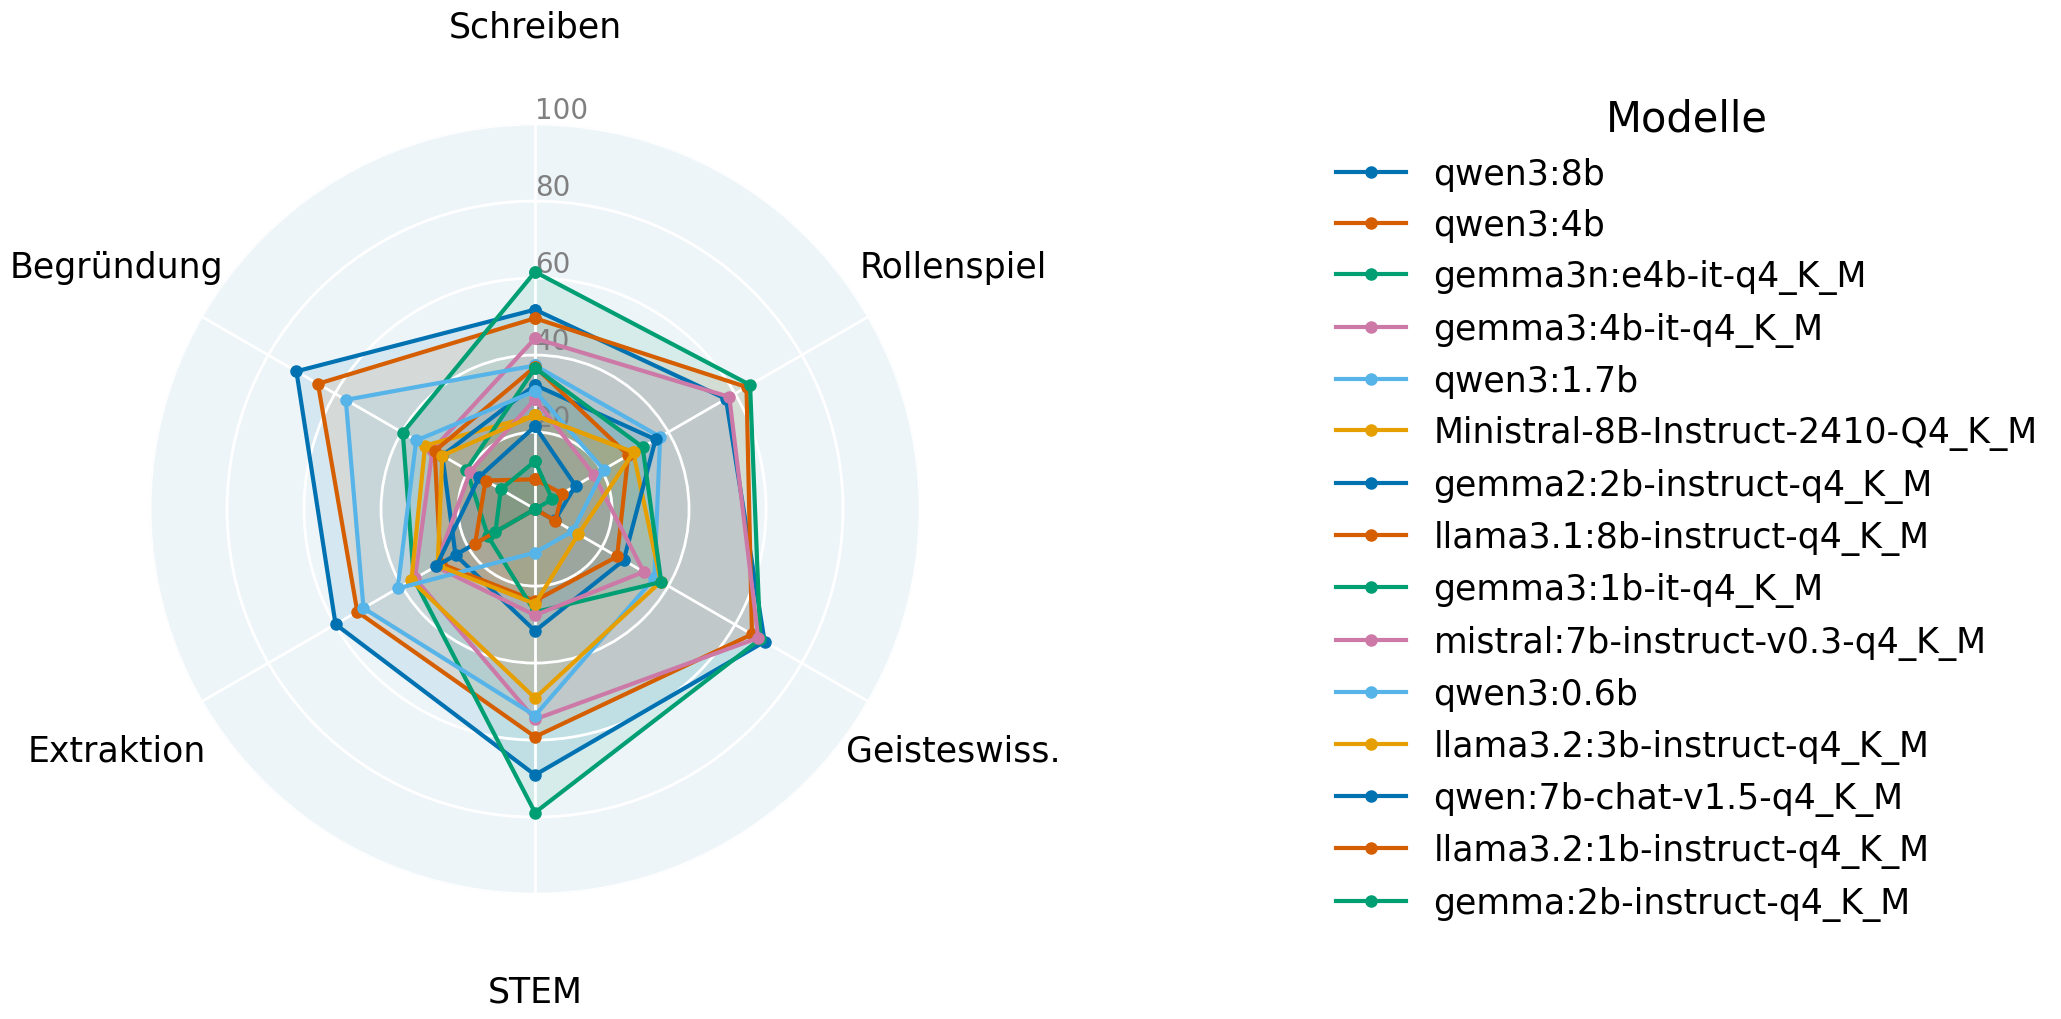

In [216]:
import json
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, Any, List
import math

def create_single_publication_radar_chart(results_file_path: str, config_file_path: str):
    """
    Create Radarchart
    """
    ELO_RANGE_MIN, ELO_RANGE_MAX = 700, 1600

    
    try:
        plt.rcParams['font.family'] = 'Garamond'
    except:
        print("Hinweis: 'Garamond' nicht gefunden. Es wird eine Standard-Serifenschrift verwendet.")
        plt.rcParams['font.family'] = 'serif'

    COLORS_PALETTE = ['#0072B2', '#D55E00', '#009E73', '#CC79A7', '#56B4E9', '#E69F00']
    MARKER_STYLES = ['o', 's', '^', 'D', 'v', 'p', '*']

    JSON_CATEGORY_ORDER = [
        'schreiben', 'rollenspiel', 'geisteswissenschaften', 'stem', 
        'extraktion', 'coding', 'math', 'begründung'
    ]
    CATEGORY_DISPLAY_MAP = {
        'schreiben': 'Schreiben', 'rollenspiel': 'Rollenspiel', 'begründung': 'Begründung',
        'math': 'Math', 'coding': 'Coding', 'extraktion': 'Extraktion',
        'stem': 'STEM', 'geisteswissenschaften': 'Geisteswiss.'
    }

    try:
        with open(results_file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        models_data = data.get("models", {})
    except (FileNotFoundError, json.JSONDecodeError) as e:
        print(f"Info: '{results_file_path}' nicht gefunden. Erstelle Dummy-Daten zum Testen. Fehler: {e}")
        models_data = {
            "qwen3:8b": {"elo_rating_by_category": {"schreiben": 1450, "rollenspiel": 1500, "begründung": 1350, "extraktion": 1250, "stem": 1280, "geisteswissenschaften": 1480, "math": 1100, "coding": 1150}},
            "gemma3n:e4b": {"elo_rating_by_category": {"schreiben": 1300, "rollenspiel": 1250, "begründung": 1400, "extraktion": 1350, "stem": 1420, "geisteswissenschaften": 1200, "math": 1380, "coding": 1400}},
            "mistral:7b": {"elo_rating_by_category": {"schreiben": 1150, "rollenspiel": 1100, "begründung": 1200, "extraktion": 1180, "stem": 1250, "geisteswissenschaften": 1120, "math": 1280, "coding": 1320}},
            "llama3.2:3b": {"elo_rating_by_category": {"schreiben": 1200, "rollenspiel": 1300, "begründung": 1250, "extraktion": 1300, "stem": 1100, "geisteswissenschaften": 1350, "math": 1150, "coding": 1250}},
            "gemma2:2b": {"elo_rating_by_category": {"schreiben": 1050, "rollenspiel": 1150, "begründung": 1100, "extraktion": 1080, "stem": 1000, "geisteswissenschaften": 1180, "math": 1020, "coding": 1050}},
        }
        if not models_data: return

    all_data_categories = set(cat for d in models_data.values() for cat in d.get("elo_rating_by_category", {}).keys())
    categories_to_plot = [cat for cat in JSON_CATEGORY_ORDER if cat in all_data_categories]
    if not categories_to_plot: return

    model_avg_elos = {name: np.mean(list(d.get("elo_rating_by_category", {}).values())) for name, d in models_data.items() if d.get("elo_rating_by_category")}
    model_names_sorted = sorted(model_avg_elos, key=model_avg_elos.get, reverse=True)

    models_to_plot = model_names_sorted

    def normalize(v):
        return 100 * (np.clip(v, ELO_RANGE_MIN, ELO_RANGE_MAX) - ELO_RANGE_MIN) / (ELO_RANGE_MAX - ELO_RANGE_MIN)

    normalized_data = {name: [normalize(models_data[name].get("elo_rating_by_category", {}).get(cat, ELO_RANGE_MIN)) for cat in categories_to_plot] for name in models_to_plot}

    num_vars = len(categories_to_plot)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1] 

    fig, ax = plt.subplots(figsize=(13, 10), subplot_kw=dict(polar=True))
    
    ax.set_facecolor('#eef5f9')
    ax.spines['polar'].set_visible(False)
    
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    plt.xticks(angles[:-1], [CATEGORY_DISPLAY_MAP.get(cat, cat) for cat in categories_to_plot], color='black', size=25)
    
    ax.tick_params(axis='x', pad=60)

    ax.set_rlabel_position(0)
    plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"], color="grey", size=20)
    plt.ylim(0, 100)
    ax.grid(True, color='white', linestyle='-', linewidth=2)

    for i, model_name in enumerate(models_to_plot):
        values = normalized_data[model_name]
        values += values[:1] 
        color = COLORS_PALETTE[i % len(COLORS_PALETTE)]
        marker = MARKER_STYLES[0]
        
        linewidth = 2 if i == 0 else 1.5 
        
        ax.plot(angles, values, color=color, linewidth=3, linestyle='solid', marker=marker, markersize=8, label=model_name)
        ax.fill(angles, values, color=color, alpha=0.1)

    ax.legend(title='Modelle', loc='center left', bbox_to_anchor=(1.5, 0.5), frameon=False, fontsize=25, title_fontsize=30)

    output_filename = 'radar_chart.png'
    plt.savefig(output_filename, dpi=300, bbox_inches='tight', transparent=False)
    print(f"Diagramm wurde als '{output_filename}' gespeichert.")

    plt.show()

# --- Ausführung ---
json_file = '../data/results.json' 
config_file = '../config/config.yaml'

create_single_publication_radar_chart(json_file, config_file)


findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond'

Diagramm wurde als 'barchart_average_elo.png' gespeichert.


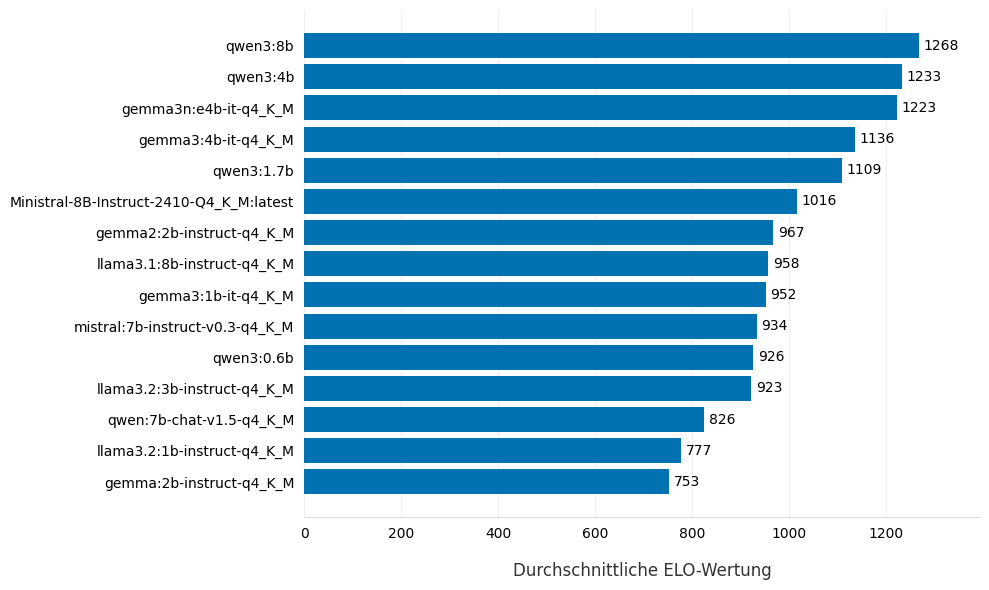

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt


def create_average_elo_barchart(results_file_path: str, config_file_path: str):
    """
    Erstellt ein professionelles, horizontales Balkendiagramm, das die durchschnittliche
    ELO-Wertung der Modelle vergleicht. Optimiert für wissenschaftliche Arbeiten.
    """
    X_AXIS_LABEL = 'Durchschnittliche ELO-Wertung'
    BAR_COLOR = '#0072B2' 
    
    

    try:
        with open(results_file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        models_data = data.get("models", {})
    except (FileNotFoundError, json.JSONDecodeError) as e:
        print(f"Info: '{results_file_path}' nicht gefunden. Erstelle Dummy-Daten zum Testen. Fehler: {e}")
        models_data = {
            "qwen3:8b": {"elo_rating_by_category": {"schreiben": 1450, "rollenspiel": 1500, "begründung": 1350, "extraktion": 1250, "stem": 1280, "geisteswissenschaften": 1480, "math": 1100, "coding": 1150}},
            "gemma3n:e4b": {"elo_rating_by_category": {"schreiben": 1300, "rollenspiel": 1250, "begründung": 1400, "extraktion": 1350, "stem": 1420, "geisteswissenschaften": 1200, "math": 1380, "coding": 1400}},
            "mistral:7b": {"elo_rating_by_category": {"schreiben": 1150, "rollenspiel": 1100, "begründung": 1200, "extraktion": 1180, "stem": 1250, "geisteswissenschaften": 1120, "math": 1280, "coding": 1320}},
            "llama3.2:3b": {"elo_rating_by_category": {"schreiben": 1200, "rollenspiel": 1300, "begründung": 1250, "extraktion": 1300, "stem": 1100, "geisteswissenschaften": 1350, "math": 1150, "coding": 1250}},
            "gemma2:2b": {"elo_rating_by_category": {"schreiben": 1050, "rollenspiel": 1150, "begründung": 1100, "extraktion": 1080, "stem": 1000, "geisteswissenschaften": 1180, "math": 1020, "coding": 1050}},
        }
        if not models_data: return

    model_avg_elos = {}
    for name, details in models_data.items():
        if 'elo_rating_by_category' in details and details['elo_rating_by_category']:
            avg_score = np.mean(list(details['elo_rating_by_category'].values()))
            model_avg_elos[name] = avg_score

    if not model_avg_elos:
        print("Keine Modelldaten zur Berechnung von Durchschnittswerten gefunden.")
        return

    sorted_models = sorted(model_avg_elos.items(), key=lambda item: item[1], reverse=False)
    model_names = [item[0] for item in sorted_models]
    avg_scores = [item[1] for item in sorted_models]

    fig, ax = plt.subplots(figsize=(10, 6))

    bars = ax.barh(model_names, avg_scores, color=BAR_COLOR)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#dddddd')
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.xaxis.grid(True, color='#eeeeee', linestyle='-')

    ax.set_xlabel(X_AXIS_LABEL, labelpad=15, color='#333333', size=12)
    ax.set_ylabel('') 
    
    for bar in bars:
        width = bar.get_width()
        label_x_pos = width + 10 
        ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width:.0f}', 
                va='center', ha='left', color='black', size=10)

    ax.set_xlim(right=max(avg_scores) * 1.1)

    plt.tight_layout()

    output_filename = 'barchart_average_elo.png'
    plt.savefig(output_filename, dpi=300, bbox_inches='tight')
    print(f"Diagramm wurde als '{output_filename}' gespeichert.")

    plt.show()

json_file = '../data/results.json'
config_file = '../config/config.yaml'
create_average_elo_barchart(json_file, config_file)


findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond'

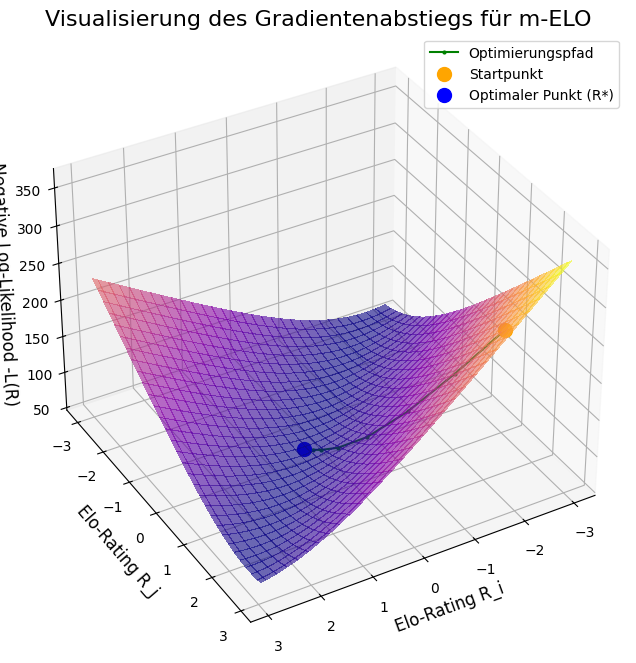

In [198]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# --- 1. Definition der Kernfunktionen ---

def probability(r_i, r_j):
    """
    Berechnet die Gewinnwahrscheinlichkeit von i über j.
    """
    return 1 / (1 + np.exp(-(r_i - r_j)))

def negative_log_likelihood(r_i, r_j, w_ij, w_ji):
    """
    Berechnet die NEGATIVE Log-Likelihood. Diese Funktion wird minimiert.
    Entspricht -L(R).
    """
    epsilon = 1e-9
    p_ij = probability(r_i, r_j)
    log_likelihood = w_ij * np.log(p_ij + epsilon) + w_ji * np.log(1 - p_ij + epsilon)
    return -log_likelihood

def compute_gradient_of_negative(r_i, r_j, w_ij, w_ji):
    """
    Berechnet den Gradienten der NEGATIVEN Log-Likelihood-Funktion.
    """
    p_ij = probability(r_i, r_j)
    # Gradient der positiven LL: grad_ri = w_ij * (1 - p_ij) - w_ji * p_ij
    # Gradient der negativen LL ist das negative davon.
    grad_ri = -(w_ij * (1 - p_ij) - w_ji * p_ij)
    grad_rj = -grad_ri
    return grad_ri, grad_rj

# --- 2. Simulation des Gradientenabstiegs ---

# Simulierte Spieldaten (wie zuvor)
W_ij = 60
W_ji = 40

# Algorithmus-Parameter
learning_rate = 0.01
iterations = 150
# Zufälliger Startpunkt
ratings_start = np.array([-2.0, 2.5])

# Speichert den Verlauf der Optimierung
path = []
current_ratings = ratings_start.copy()

for i in range(iterations):
    # Negative Log-Likelihood am aktuellen Punkt berechnen
    nll = negative_log_likelihood(current_ratings[0], current_ratings[1], W_ij, W_ji)
    path.append(np.append(current_ratings, nll))

    # Gradient der negativen Funktion berechnen
    grad_ri, grad_rj = compute_gradient_of_negative(current_ratings[0], current_ratings[1], W_ij, W_ji)
    
    # Ratings aktualisieren (Schritt GEGEN die Richtung des Gradienten -> Abstieg)
    current_ratings[0] -= learning_rate * grad_ri
    current_ratings[1] -= learning_rate * grad_rj

path = np.array(path)

# --- 3. Erstellung der 3D-Grafik ---

# Erstelle ein Grid für die Oberflächendarstellung
R_range = np.arange(-3, 3, 0.1)
R_i, R_j = np.meshgrid(R_range, R_range)
NLL_surface = negative_log_likelihood(R_i, R_j, W_ij, W_ji)

# Plot erstellen
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Oberfläche plotten (invertierte "Schüssel")
surf = ax.plot_surface(R_i, R_j, NLL_surface, cmap=cm.plasma, alpha=0.6,
                       linewidth=0, antialiased=False)

# Optimierungspfad plotten
ax.plot(path[:, 0], path[:, 1], path[:, 2], color='g', marker='.', markersize=4, label='Optimierungspfad')
ax.scatter(path[0, 0], path[0, 1], path[0, 2], color='orange', s=100, label='Startpunkt', depthshade=True)
ax.scatter(path[-1, 0], path[-1, 1], path[-1, 2], color='blue', s=100, label='Optimaler Punkt (R*)', depthshade=True)

# Labels und Titel
ax.set_title("Visualisierung des Gradientenabstiegs für m-ELO", fontsize=16)
ax.set_xlabel('Elo-Rating R_i', fontsize=12)
ax.set_ylabel('Elo-Rating R_j', fontsize=12)
ax.set_zlabel('Negative Log-Likelihood -L(R)', fontsize=12)
ax.view_init(elev=35, azim=60) # Perspektive anpassen
ax.legend()

plt.show()